In [1]:
import matplotlib;


#import seaborn as sns
%pylab inline
#from netCDF4 import Dataset
import matplotlib.pyplot as plt;
import pickle

from scipy.integrate import ode;
import scipy.signal;
from pylab import *;
#import cartopy as cp
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
asin=np.arcsin
sqrt=np.sqrt
sin=np.sin
cos=np.cos
pi=np.pi
exp=np.exp
tan=np.tan
I=1j
inf=np.inf
pi=np.pi
hilbert=scipy.signal.hilbert;
import pandas as pd;
import statsmodels.api as sm
import cartopy as ct
#import arviz
import netCDF4
from matplotlib.lines import Line2D
import scipy.io 
import datashader as ds
import colorcet as cc
import xarray as xr
from datashader.mpl_ext import dsshow
from statsmodels.distributions.empirical_distribution import ECDF

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/app/conda/miniconda/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
with open('DetStatic.pkl', 'rb') as f:
    DetStatic = pickle.load(f)

In [3]:
with open('CExportATOM.pkl', 'rb') as f:
    CExportATOM = pickle.load(f)

In [4]:
with open('CExportControl.pkl', 'rb') as f:
    CExportControl = pickle.load(f)

In [5]:
with open('CExportGrowthRate.pkl', 'rb') as f:
    CExportGrowthRate = pickle.load(f)

In [6]:
with open('CExportTComp.pkl', 'rb') as f:
    CExportTComp = pickle.load(f)

In [7]:
with open('CExportFrugal.pkl', 'rb') as f:
    CExportFrugal = pickle.load(f)

In [14]:
with open('latGrid.pkl', 'rb') as f:
    lat = pickle.load(f)
    
with open('lonGrid.pkl', 'rb') as f:
    lon = pickle.load(f)

In [8]:
TotalCExport = sum(sum(CExportATOM*DetStatic,1),0)*1e-15
TotalCExportTComp = sum(sum(CExportTComp*DetStatic,1),0)*1e-15
TotalCExportFrugal = sum(sum(CExportFrugal*DetStatic,1),0)*1e-15
TotalCExportGrowthRate = sum(sum(CExportGrowthRate*DetStatic,1),0)*1e-15
TotalCExportControl = sum(sum(CExportControl*DetStatic,1),0)*1e-15

In [11]:
print([TotalCExport,TotalCExportControl,TotalCExportFrugal,TotalCExportGrowthRate,TotalCExportTComp])

[8.208254217429117, 7.46270741455538, 8.593402799514008, 8.111149247830676, 8.52209728312031]


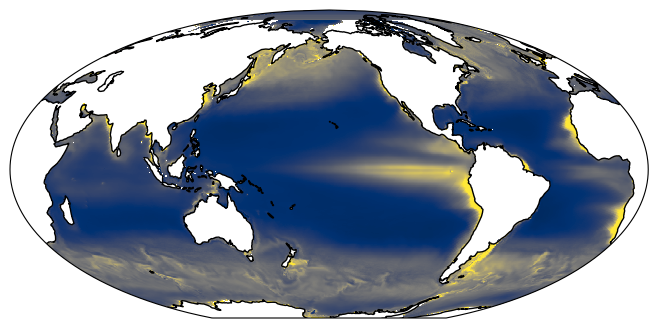

In [15]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportATOM,vmin=0,vmax=80.0,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)
#plt.savefig("CExportDynamic.png",bbox_inches="tight",dpi=300)

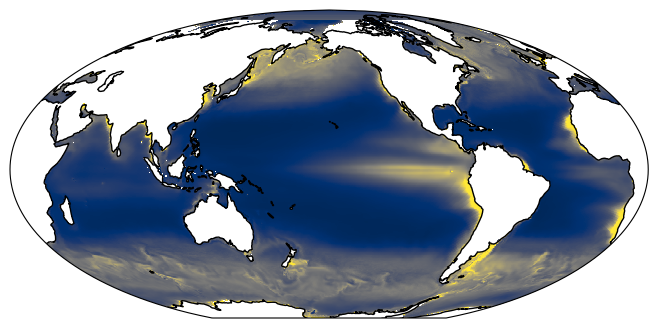

In [16]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportControl,vmin=0,vmax=80.0,transform=proj2,cmap="cividis")
#ax.text(18,70, "$7.5\, Pg\, C/yr$", fontsize=20,transform=proj2)

#plt.savefig("CExportStatic.png",bbox_inches="tight",dpi=300)

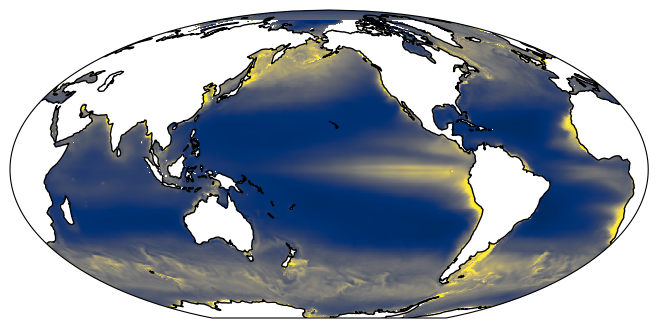

In [17]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportTComp,vmin=0,vmax=80.0,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.5\, Pg\, C/yr$", fontsize=20,transform=proj2)

#plt.savefig("CExportTranslationComp.png",bbox_inches="tight",dpi=300)

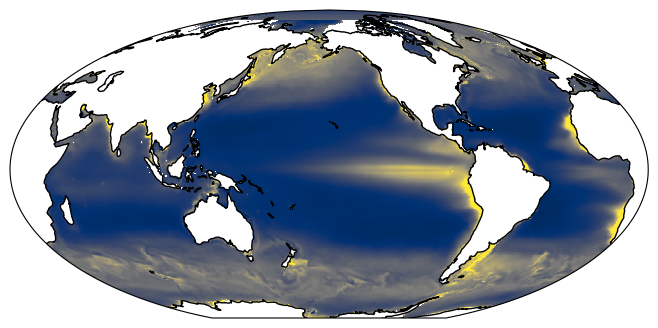

In [19]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()


ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportGrowthRate,vmin=0,vmax=80.0,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.1\, Pg\, C/yr$", fontsize=20,transform=proj2)

#plt.savefig("CExportGrowthRate.png",bbox_inches="tight",dpi=300)

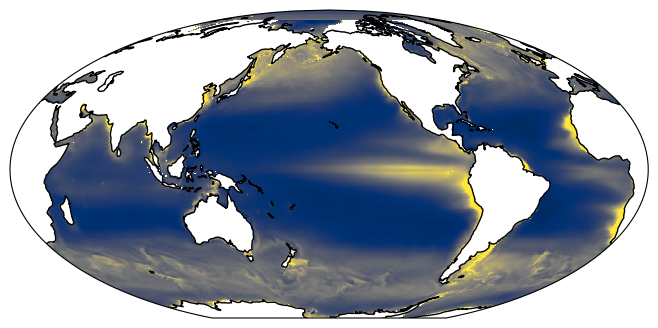

In [20]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportFrugal,vmin=0,vmax=80.0,transform=proj2,cmap="cividis")
#ax.text(18,70, "$8.6\, Pg\, C/yr$", fontsize=20,transform=proj2)

#plt.savefig("CExportFrugal.png",bbox_inches="tight",dpi=300)

(array([ 0, 20, 40, 60, 80]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

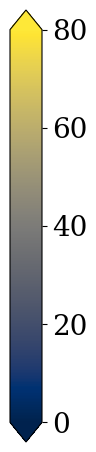

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_axes([0.8, 0.05, 0.05, 0.9])

cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', 
                               cmap='cividis',
                               norm=mpl.colors.Normalize(0, 80),  # vmax and vmin
                               extend='both',
                               ticks=[0, 20, 40,60, 80],
                              )
plt.yticks(fontsize=20)


#plt.savefig('CExportColorbar.png', bbox_inches='tight',dpi=300)

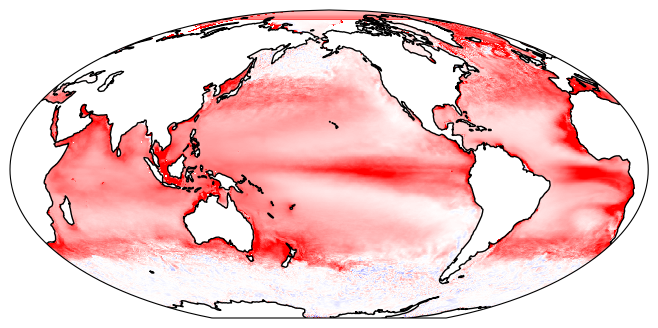

In [22]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportFrugal-CExportControl,vmin=-10,vmax=10.0,transform=proj2,cmap="bwr")
#ax.text(18,70, "$8.6\, Pg\, C/yr$", fontsize=20,transform=proj2)

#plt.savefig("CExportFrugalAnomaly.png",bbox_inches="tight",dpi=300)

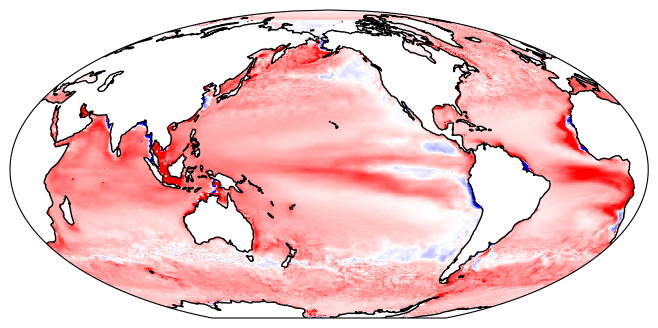

In [24]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()


ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportTComp-CExportControl,vmin=-10,vmax=10.0,transform=proj2,cmap="bwr")
#ax.text(18,70, "$8.6\, Pg\, C/yr$", fontsize=20,transform=proj2)

#plt.savefig("CExportFrugalAnomaly.png",bbox_inches="tight",dpi=300)

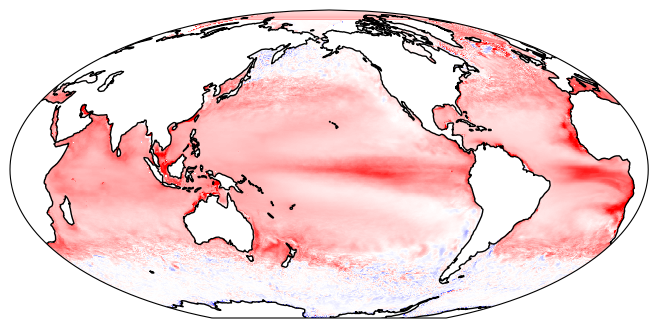

In [26]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportATOM-CExportControl,vmin=-10,vmax=10.0,transform=proj2,cmap="bwr")
#ax.text(18,70, "$8.2\, Pg\, C/yr$", fontsize=20,transform=proj2)

#plt.savefig("CExportDynamicAnomaly.png",bbox_inches="tight",dpi=300)

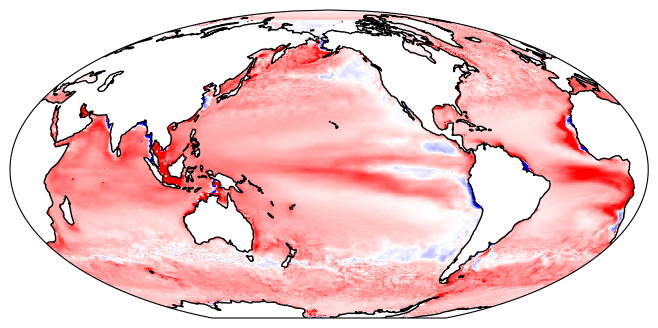

In [27]:
fig = plt.figure(figsize=(10,4))



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportTComp-CExportControl,vmin=-10,vmax=10.0,transform=proj2,cmap="bwr")
#ax.text(18,70, "$8.5\, Pg\, C/yr$", fontsize=20,transform=proj2)

#plt.savefig("CExportTranslationCompAnomaly.png",bbox_inches="tight",dpi=300)

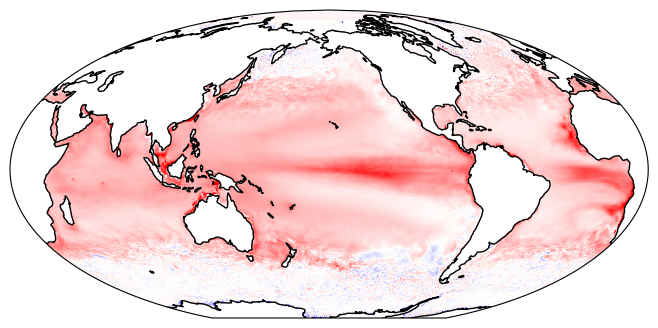

In [29]:
fig = plt.figure(figsize=(10,4))
projection = ct.crs.Mollweide(central_longitude=200)
proj2 = ct.crs.PlateCarree()



ax = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines(resolution="110m")



ax.pcolormesh(lon,lat,CExportGrowthRate-CExportControl,vmin=-10,vmax=10.0,transform=proj2,cmap="bwr")
#ax.text(18,70, "$8.1\, Pg\, C/yr$", fontsize=20,transform=proj2)

#plt.savefig("CExportGrowthRateAnomaly.png",bbox_inches="tight",dpi=300)

(array([-10,  -5,   0,   5,  10]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

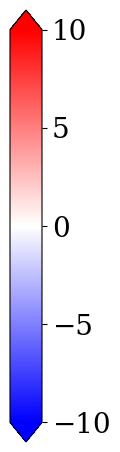

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_axes([0.8, 0.05, 0.05, 0.9])

cb = mpl.colorbar.ColorbarBase(ax, orientation='vertical', 
                               cmap='bwr',
                               norm=mpl.colors.Normalize(-10, 10),  # vmax and vmin
                               extend='both',
                               ticks=[-10, -5, 0, 5,10],
                              )
plt.yticks(fontsize=20)


#plt.savefig('CExportAnomalyColorbar.png', bbox_inches='tight',dpi=300)